In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Montar o drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#arquivo = "/content/drive/MyDrive/Mestrado/Mestrado_Otacílio_Raphael/DataSetDGA/DataSet_DGA_(Rev1)T1.xlsx"
arquivo = "/content/drive/MyDrive/Mestrado/Mestrado_Otacílio_Raphael/DataSetDGA/DataSetDGA(Rev1)T1_S.Outiliers.xlsx"

In [4]:
DataSet = pd.read_excel(arquivo)                                                                          # Sintaxe para nomear DataSet.
DataSet.head()

,Unnamed: 0,H2,CH4,C2H4,C2H6,C2H2,NTE,NF,Rótulo
0,0,21.00,63.0,4.0,87.0,1.0,0,0,NO
1,1,0.01,61.0,6.0,81.0,1.0,0,0,NO
2,2,0.01,58.0,5.0,77.0,1.0,0,0,NO
3,3,0.01,56.0,6.0,73.0,1.0,0,0,NO
4,4,0.01,58.0,5.0,75.0,1.0,0,0,NO


In [5]:
gases = ['H2', 'CH4', 'C2H4', 'C2H6', 'C2H2']
X = DataSet[gases].values
m, n = X.shape

xmax = np.max(X,axis = 0)
xmin = np.min(X,axis = 0)
print('Valores máximos:', xmax)
print('Valores mínimos:', xmin)

Valores máximos: [22566. 64064. 95650. 72128. 57000.]
Valores mínimos: [0.01 0.01 0.01 0.01 0.01]


In [6]:
Xl = np.log(X)
#Xn = np.log(X)

In [7]:
# Normalizar DataSet:
from sklearn.preprocessing import StandardScaler
Xn = StandardScaler().fit_transform(Xl)
print('Média antes:',np.mean(X))
print('Média depois:',np.mean(Xn))
print('Variância antes:',np.std(X))
print('Variância depois:',np.std(Xn))
np.isnan(Xn)

Média antes: 138.30720459081837
Média depois: -6.52394527843605e-17
Variância antes: 1617.3875441693656
Variância depois: 0.9999999999999999


array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       ...,
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [8]:
y = DataSet['NTE'].values


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.33, random_state=101)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
A = np.array([])
vizinhos = np.arange(1, 50, 2)
for n in vizinhos:
  knn = KNeighborsClassifier(n_neighbors=n,  weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  A = np.append(A, np.sum(pred==y_test)/len(pred))



(0.9, 1.0)

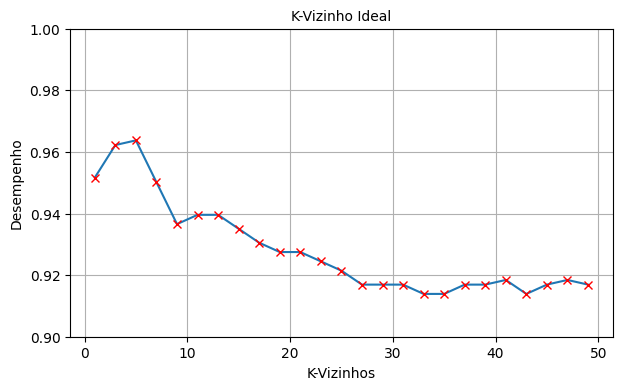

In [42]:
plt.figure(figsize = (7, 4))
plt.plot(vizinhos, A)
plt.plot(vizinhos, A, 'rx')
plt.title("K-Vizinho Ideal",fontsize=10)
plt.xlabel('K-Vizinhos',fontsize=10)
plt.ylabel('Desempenho',fontsize=10)
plt.grid()
plt.ylim((0.9, 1))

In [37]:
knn = KNeighborsClassifier(n_neighbors=5,  weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [38]:
pred.shape

(662,)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       442
           1       0.94      0.91      0.93       129
           2       0.95      0.87      0.91        91

    accuracy                           0.96       662
   macro avg       0.95      0.92      0.94       662
weighted avg       0.96      0.96      0.96       662

[[436   4   2]
 [  9 118   2]
 [  9   3  79]]


In [ ]:
np.sum(pred==y_test)/len(pred)

0.9637462235649547

In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
E1 = y_test

In [ ]:
E1.shape

(662,)

In [ ]:
E2 = pred

In [ ]:
E2.shape

(662,)

In [ ]:
K_Knn = cohen_kappa_score(E1,E2, weights = 'linear')

In [ ]:
K_Knn

0.9255079006772009

In [ ]:
E3.shape

(662,)

In [ ]:
K_Knn2 = cohen_kappa_score(E3,E4, weights = 'linear')

In [ ]:
K_Knn2

0.9255079006772009